In [17]:
import requests
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# === Step 1: Get DJIA constituents using Financial Modeling Prep API ===
api_key = "oKGLohC4xS1ZJ4u5U7bXOuzYmmJsgLQJ"
url = f"https://financialmodelingprep.com/api/v3/dowjones_constituent?apikey={api_key}"

response = requests.get(url)
if response.status_code != 200:
    raise Exception("Failed to retrieve data from FMP API")

djia_constituents = pd.DataFrame(response.json())
djia_constituents.to_csv("djia_constituents.csv", index=False)  # optional save

# === Step 2: Set date range (5 years) ===
start_date = datetime.now() - timedelta(days=365 * 5)
end_date = datetime.now()

# === Step 3: Download 'Close' prices for each ticker ===
tickers = djia_constituents['symbol'].tolist()
dataframes = []

for symbol in tickers:
    try:
        print(f"Downloading: {symbol}")
        data = yf.download(symbol, start=start_date, end=end_date)
        
        # Check if 'Close' column exists
        if 'Close' not in data.columns:
            print(f"Warning: 'Close' price not found for {symbol}. Skipping.")
            continue
        
        data = data[['Close']]
        data.columns = [symbol]  # Rename to symbol for identification
        dataframes.append(data)
        
    except Exception as e:
        print(f"Failed to fetch data for {symbol}: {e}")

# === Step 4: Combine into a single DataFrame ===
djia_data = pd.concat(dataframes, axis=1)
djia_data.to_csv("djia_data_close.csv")

# === Step 5: Fill missing data ===
djia_data_filled = djia_data.ffill()
djia_data_filled.to_csv("djia_data_close_filled.csv")

# === Preview ===
print("\nConstituents:")
print(djia_constituents.head())

print("\nClose Price Data (sample):")
print(djia_data_filled.head())


Downloading: NVDA


/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: SHW


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: AMZN
Downloading: AMGN


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: CRM
Downloading: HON


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: GS
Downloading: AAPL


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: NKE


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: V
Downloading: UNH


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: CSCO
Downloading: TRV


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: CVX


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Downloading: VZ
Downloading: HD



/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: MSFT


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: JNJ


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: WMT


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: CAT


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: DIS
Downloading: JPM


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: BA
Downloading: KO


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: MCD


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: AXP
Downloading: IBM


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: MRK


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: MMM


[*********************100%***********************]  1 of 1 completed
/var/folders/1j/41kq93912b15xcnh4k_n0pzc0000gn/T/ipykernel_83373/1252783023.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)


Downloading: PG


[*********************100%***********************]  1 of 1 completed


Constituents:
  symbol                        name             sector  \
0   NVDA                      Nvidia         Technology   
1    SHW            Sherwin-Williams    Basic Materials   
2   AMZN  Amazon.com, Inc.amazon.com  Consumer Cyclical   
3   AMGN                  Amgen Inc.         Healthcare   
4    CRM            Salesforce, Inc.         Technology   

                      subSector        headQuarter dateFirstAdded         cik  \
0                Semiconductors    Santa Clara, CA     2024-11-08  0001045810   
1         Chemicals - Specialty      Cleveland, OH     2024-11-08  0000089800   
2              Specialty Retail        Seattle, WA     2024-02-26  0001018724   
3  Drug Manufacturers - General  Thousand Oaks, CA     2020-08-31  0000318154   
4        Software - Application  San Francisco, CA     2020-08-31  0001108524   

      founded  
0  1993-04-05  
1  1866-01-01  
2  1994-07-05  
3  1980-04-08  
4  1999-02-03  

Close Price Data (sample):
                 NV

In [19]:
# Read the wide-format 'Close' price data
djia_data = pd.read_csv("djia_data_close_filled.csv", index_col=0, parse_dates=True)

# Calculate daily returns
daily_returns = djia_data.pct_change()

# Save and preview
daily_returns.to_csv("djia_daily_returns.csv")
print(daily_returns.head())

                NVDA       SHW      AMZN      AMGN       CRM       HON  \
Date                                                                     
2020-07-16       NaN       NaN       NaN       NaN       NaN       NaN   
2020-07-17  0.006586  0.018905 -0.012644  0.012774  0.012237  0.012542   
2020-07-20  0.030314 -0.003295  0.079295  0.009634  0.038928 -0.010387   
2020-07-21 -0.017340  0.008749 -0.018315 -0.011650 -0.021990  0.008932   
2020-07-22  0.010675  0.020378 -0.012230 -0.003606  0.002673 -0.000969   

                  GS      AAPL       NKE         V  ...       DIS       JPM  \
Date                                                ...                       
2020-07-16       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2020-07-17 -0.015186 -0.002020 -0.010076  0.008217  ... -0.006531 -0.018498   
2020-07-20  0.001419  0.021074 -0.006543  0.017325  ... -0.007248 -0.008761   
2020-07-21  0.001464 -0.013802  0.028333 -0.010027  ...  0.007046  0.021686   
2020-07

In [23]:
# Step 1: Drop the first row (all NaN returns)
daily_returns_filtered = daily_returns.iloc[1:]

# Step 2: Define a function to get the 10 lowest-return tickers for a single day
def get_top_losers(row):
    sorted_returns = row.sort_values()
    return pd.DataFrame({
        'Date': [row.name] * 10,
        'Symbol': sorted_returns.index[:10],
        'Daily Return': sorted_returns.values[:10]
    })

# Step 3: Apply the function to each row (i.e. each date)
lowest_daily_returns = pd.concat([get_top_losers(row) for _, row in daily_returns_filtered.iterrows()])

# Step 4: Preview
print(lowest_daily_returns.head(10))


        Date Symbol  Daily Return
0 2020-07-17    JPM     -0.018498
1 2020-07-17     BA     -0.017012
2 2020-07-17     GS     -0.015186
3 2020-07-17    CVX     -0.013242
4 2020-07-17   AMZN     -0.012644
5 2020-07-17    AXP     -0.011836
6 2020-07-17    TRV     -0.011120
7 2020-07-17    NKE     -0.010076
8 2020-07-17    DIS     -0.006531
9 2020-07-17   MSFT     -0.005100


In [24]:
import pandas as pd
import numpy as np

# Ensure 'Date' columns are in datetime format
lowest_daily_returns['Date'] = pd.to_datetime(lowest_daily_returns['Date'])
djia_data = pd.read_csv("djia_data_close_filled.csv", index_col=0, parse_dates=True)

# Initialize capital and result tracking
initial_capital = 100000
capital = initial_capital
results = []

# Get all tradeable dates (skip final date since we sell next day)
trade_dates = lowest_daily_returns['Date'].sort_values().unique()
trade_dates = trade_dates[trade_dates < djia_data.index.max()]  # skip last available date

# Simulate day-by-day trading
for current_date in trade_dates:
    next_date = djia_data.index[djia_data.index > current_date]
    if next_date.empty:
        continue
    next_date = next_date[0]

    # Get 10 biggest losers on current date
    losers = lowest_daily_returns[lowest_daily_returns['Date'] == current_date]
    if len(losers) < 10:
        continue

    amount_per_stock = capital / 10
    total_value = 0

    for _, row in losers.iterrows():
        symbol = row['Symbol']

        try:
            buy_price = djia_data.loc[current_date, symbol]
            sell_price = djia_data.loc[next_date, symbol]
        except KeyError:
            continue  # missing data

        if pd.isna(buy_price) or pd.isna(sell_price) or buy_price == 0:
            continue

        shares = amount_per_stock / buy_price
        proceeds = shares * sell_price
        total_value += proceeds

    # Only update capital if at least one trade succeeded
    if total_value > 0:
        capital = total_value
        results.append({'Date': next_date, 'Capital': capital})

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Final results
final_capital = results_df['Capital'].iloc[-1]
total_return = (final_capital - initial_capital) / initial_capital * 100

# Output
print(f"Final Capital: ${final_capital:,.2f}")
print(f"Total Return: {total_return:.2f}%")

# Save or view
results_df.to_csv("trading_simulation_results.csv", index=False)
results_df.head()


Final Capital: $198,264.61
Total Return: 98.26%


,Date,Capital
0,2020-07-20,100563.922514
1,2020-07-21,102383.088139
2,2020-07-22,102942.822008
3,2020-07-23,102204.719269
4,2020-07-24,101747.535384


In [25]:
import numpy as np

# Assuming 252 trading days in a year
trading_days = 252

# Step 1: Calculate daily capital returns
results_df['Capital Return'] = results_df['Capital'].pct_change()

# Step 2: Calculate annualized return (CAGR)
total_days = (results_df['Date'].iloc[-1] - results_df['Date'].iloc[0]).days
annual_return = (results_df['Capital'].iloc[-1] / results_df['Capital'].iloc[0]) ** (365 / total_days) - 1

# Step 3: Annualized volatility
daily_volatility = results_df['Capital Return'].std()
annual_volatility = daily_volatility * np.sqrt(trading_days)

# Step 4: Sharpe Ratio (risk-free rate = 0)
sharpe_ratio = annual_return / annual_volatility if annual_volatility > 0 else np.nan

# Step 5: Maximum Drawdown
cumulative_max = results_df['Capital'].cummax()
drawdowns = (results_df['Capital'] - cumulative_max) / cumulative_max
max_drawdown = drawdowns.min()

# Print results
print(f"Annualized Return     : {annual_return*100:.2f}%")
print(f"Annualized Volatility : {annual_volatility*100:.2f}%")
print(f"Sharpe Ratio          : {sharpe_ratio:.2f}")
print(f"Maximum Drawdown      : {max_drawdown*100:.2f}%")


Annualized Return     : 14.58%
Annualized Volatility : 18.12%
Sharpe Ratio          : 0.80
Maximum Drawdown      : -31.12%


In [38]:
# Step 1: Organize performance metrics
performance_metrics = pd.DataFrame({
    'Annualized Return (%)': [annual_return * 100, annual_return_dia * 100],
    'Annualized Volatility (%)': [annual_volatility * 100, annual_volatility_dia * 100],
    'Sharpe Ratio': [sharpe_ratio, sharpe_ratio_dia]
}, index=['Mean Reversion', 'Dow Jones'])

# Step 2: Round for clean display
performance_metrics = performance_metrics.round(2)

# Step 3: Display the comparison table
print("📊 Strategy Performance Comparison:\n")
print(performance_metrics)

# Step 4: Determine which strategy has the higher Sharpe Ratio
better_strategy = performance_metrics['Sharpe Ratio'].idxmax()
print(f"\n🏆 Strategy with the higher risk-adjusted return (Sharpe Ratio): {better_strategy}")


📊 Strategy Performance Comparison:

                                 Annualized Return (%)  \
Mean Reversion                               14.583631   
Dow Jones       Ticker
DIA    14.119796
dtype: float64   

                             Annualized Volatility (%)  \
Mean Reversion                               18.120043   
Dow Jones       Ticker
DIA    15.170822
dtype: float64   

                                         Sharpe Ratio  
Mean Reversion                               0.804834  
Dow Jones       Ticker
DIA    0.930721
dtype: float64  


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

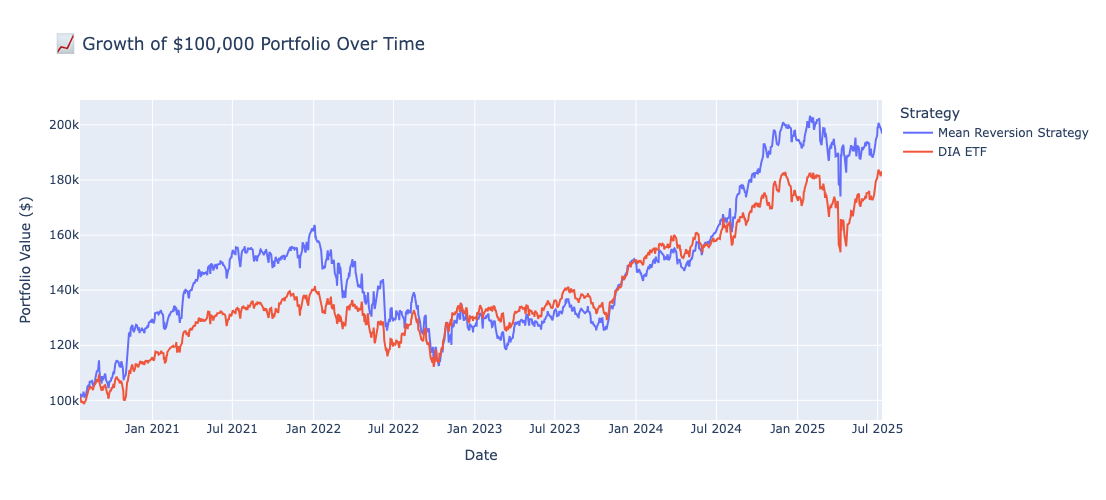

In [49]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Ensure 'Date' is datetime and set index for results
if 'Date' in results.columns:
    results['Date'] = pd.to_datetime(results['Date'])
    results.set_index('Date', inplace=True)

# Step 2: Compute cumulative returns and portfolio value for mean reversion strategy
results['Daily Return'] = results['Capital'].pct_change().fillna(0)
results['Cumulative Return'] = (1 + results['Daily Return']).cumprod()
results['Portfolio Value'] = results['Cumulative Return'] * 100000

# Step 3: Prepare DIA data (it's already daily returns)
# Rename for clarity
dia_data = dia_data.rename(columns={'DIA': 'Daily Return'})
dia_data['Cumulative Return'] = (1 + dia_data['Daily Return']).cumprod()
dia_data['Portfolio Value'] = dia_data['Cumulative Return'] * 100000

# Step 4: Align on common dates
common_dates = results.index.intersection(dia_data.index)
results_aligned = results.loc[common_dates]
dia_aligned = dia_data.loc[common_dates]

# Step 5: Plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=results_aligned.index,
    y=results_aligned['Portfolio Value'],
    mode='lines',
    name='Mean Reversion Strategy'
))

fig.add_trace(go.Scatter(
    x=dia_aligned.index,
    y=dia_aligned['Portfolio Value'],
    mode='lines',
    name='DIA ETF'
))

fig.update_layout(
    title='📈 Growth of $100,000 Portfolio Over Time',
    xaxis_title='Date',
    yaxis_title='Portfolio Value ($)',
    legend_title='Strategy',
    width=1000,
    height=500
)

fig.show()
